In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Linear Regression

Algorithm Type
* Supervised 
* Discriminative 
* Parametric 

Model fitting:
+ Loss: mean squared error (MSE), mean absolute error (MAE)
+ Optimization: Gradient Descent/Analytical Solution
+ Regularization: L1 Lasso Regression or L2 Ridge Regression (Tiknov)

In [ ]:
# Linear Regression No Regularization (Closed form vs Gradient Descent)

class l1_regularization():
    """ Regularization for Lasso Regression """
    def __init__(self, alpha):
        self.alpha = alpha
    
    def __call__(self, w):
        return self.alpha * np.linalg.norm(w)

    def grad(self, w):
        return self.alpha * np.sign(w)

class l2_regularization():
    """ Regularization for Ridge Regression """
    def __init__(self, alpha):
        self.alpha = alpha
    
    def __call__(self, w):
        return self.alpha * 0.5 *  w.T.dot(w)

    def grad(self, w):
        return self.alpha * w

class LinearRegression():
    """ Base regression model. Models the relationship between a scalar dependent variable y and the independent 
    variables X. 
    Parameters:
    -----------
    max_iter: int
        The number of training iterations the algorithm will tune the weights for.
    learning_rate: double
        The step length that will be used when updating the weights.
    """
    def __init__(self, max_iter=1000, learning_rate=.01, min_loss=.0001, regularization=l2_regularization(.5)):
        self.max_iter = max_iter
        self.min_loss = min_loss
        self.learning_rate = learning_rate
        self.regularization = regularization
        self._lambda = lambda_value
        
    def init_weights(self, num_features):
        self.w = np.random.rand(1, num_features)
        self.b = np.random.rand(1)

    def model(self, X):
        y_pred = np.dot(X, self.w.T) + self.b        
        return y_pred
        
    def loss(self, y, y_pred):
        return  np.sum((y_pred - y)**2)/y.shape[0]
    
    def regularization_l1(self, w):
        return  self._lambda * np.linalg.norm(w)

    # def regularization_l2(self, w):
    #     return  (self._lambda * .5 * w.T.dot(w)

    def gradient(self, X, y):
        y_pred = self.model(X)
        error  = y_pred - y
        
        dXdw = np.dot(X.T, error)*(2/X.shape[0])
        dXdb = np.sum(error)*(2/X.shape[0])
        return dXdw, dXdb
        
    def fit(self, X, y):
        # Insert constant ones for bias weights.
        X = np.insert(X, 0, 1, axis=1)       
        self.init_weights(num_features = X.shape[1])
        self.training_errors = []

        i = 0 
        ii = 0
        while i < self.max_iter:

            y_pred =  self.model(X)
            error = self.loss(y, y_pred) + self.regularization(self.w)
            self.training_errors.append(error)

             # Gradient of l2 loss w.r.t w
            grad_w = -(y - y_pred).dot(X) + self.regularization.grad(self.w)

            dXdw, dXdb = self.gradient(X, y)

            self.w -= self.learning_rate*dXdw.T
            self.b -= self.learning_rate*dXdb
            
            if (error < self.min_loss):
                print("training finished", "mse = ", new_loss, "num iter = ", i)
                break
                
            if np.mod(i,50) == 0:
                print(i,"th iteration, loss", new_loss)
            if self.loss < new_loss:
                ii += 1
                if (ii > 5):
                    print("Error has not improved for", ii, "iterations", "mse = ", new_loss, "num iter = ", i)
                    break
            else:
                ii = 0
            i += 1
            
    def predict(self, X):
        return self.model(X)

### 2-D Regression Example 

0 th iteration, loss 0.1536274998306345
50 th iteration, loss 0.03598295212704239
100 th iteration, loss 0.024963977718159475
150 th iteration, loss 0.017319317806734513
200 th iteration, loss 0.012015664037084676
250 th iteration, loss 0.0083361356297735
300 th iteration, loss 0.005783380512596249
350 th iteration, loss 0.004012349563269618
400 th iteration, loss 0.002783657236940632
450 th iteration, loss 0.001931224458533356
500 th iteration, loss 0.0013398301557186432
550 th iteration, loss 0.0009295371329008056
600 th iteration, loss 0.0006448871730148693
650 th iteration, loss 0.0004474048977702177
700 th iteration, loss 0.00031039715306007835
750 th iteration, loss 0.0002153449662888683
800 th iteration, loss 0.00014940038608208107
850 th iteration, loss 0.00010364985885731884
training finished mse =  9.992874072081903e-05 num iter =  855


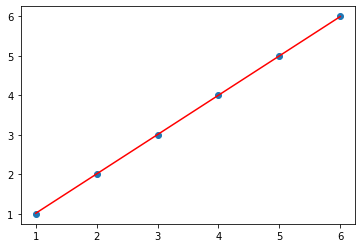

In [ ]:
X = np.array([[1,2,3,4,5,6]]).T
y = np.array([[1,2,3,4,5,6]]).T

model = LinearRegression(regularization=False)
model.fit(X,y)

X_test = X
y_pred = model.predict(X_test)
plt.scatter(X, y)
plt.plot(X_test, y_pred, c="red")

### 3-D Regression Example

(7, 2) (7, 1) (1, 2)
0 th iteration, loss 0.4156804209422561
50 th iteration, loss 0.14207103178080036
100 th iteration, loss 0.08043396890424666
150 th iteration, loss 0.04703913832685684
200 th iteration, loss 0.028366017789091192
250 th iteration, loss 0.017578905255145594
300 th iteration, loss 0.011147566915683258
350 th iteration, loss 0.007201400457570297
400 th iteration, loss 0.004719525587829484
450 th iteration, loss 0.0031266965857462735
500 th iteration, loss 0.002088057487623134
550 th iteration, loss 0.001402540516784097
600 th iteration, loss 0.0009460015802667357
650 th iteration, loss 0.000639955754365504
700 th iteration, loss 0.00043382374534419994
750 th iteration, loss 0.00029451905385823637
800 th iteration, loss 0.00020015199898666555
850 th iteration, loss 0.00013611903455339742
training finished mse =  9.926206416664327e-05 num iter =  891


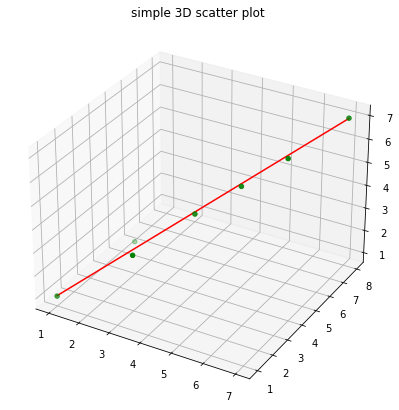

In [ ]:
X = np.array([[1,2,3,4,5,6,7], [1,4,2,4,5,6,8]]).T
y = np.array([[1,2,3,4,5,6, 7]]).T
print(X.shape, y.shape, w.shape)
w = np.random.rand(1,X.shape[1])
b = np.random.rand(1)
y_pred = np.dot(X, w.T) + b        
y_pred.shape
model = LinearRegression(regularization=False)
model.fit(X,y)

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(X[:,0], X[:,1], y, color = "green")
plt.title("simple 3D scatter plot")

y_pred = model.predict(X)
ax.plot([X[0,0], X[-1,0]], [X[0,1], X[-1,1]],zs=[y_pred[0,0], y_pred[-1,0]], color='red')

# show plot
plt.show()
